# Differential Cross Section

_Authors: Jurjan Bootsma, Bouke Jung, Maarten de Jong

In this notebook there is worked with the differential cross section (the cross section as a function of the bjorken-x and the bjorken-y. This notebook creates plots for the differential cross section as a function of energy, bjorken-x and bjorken-y. At the beginning you can choose which file to look at.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import km3pipe as kp
import km3modules as km
import km3io
from km3net_testdata import data_path
from particle import Particle

In [40]:
#Reading the data
filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_1-100GeV.115.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-CC_1-100GeV.102.root"
#filename =  "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_anti-muon-NC_1-100GeV.130.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_anti-muon-CC_1-100GeV.122.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_elec-CC_1-100GeV.102.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_tau-CC_3-100GeV.1070.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_antitau-CC_3-100GeV.411.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_anti-elec-CC_1-100GeV.102.root"
#filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.132.root"
f = km3io.OfflineReader(data_path(filename))

In [41]:
#General
bjorken_x = f.w2list[:,7]
bjorken_y = f.w2list[:,8]
cross_section = f.w2list[:,14] #Differential cross section!
energies = f.mc_tracks.E[:,0]

#Hydrogen
hydrogen = (f.mc_tracks.pdgid[:,1]==2212)
bjorken_x_H = bjorken_x[hydrogen]
bjorken_y_H = bjorken_y[hydrogen]
cross_section_H = cross_section[hydrogen]
energies_H = energies[hydrogen]
interaction_channel_H = f.w2list[:,9][hydrogen]

#Oxygen
oxygen = (f.mc_tracks.pdgid[:,1]==1000080160)
bjorken_x_O = bjorken_x[oxygen]
bjorken_y_O = bjorken_y[oxygen]
cross_section_O = cross_section[oxygen]
energies_O = energies[oxygen]
interaction_channel_O = f.w2list[:,9][oxygen]

# Differential Cross Section as a Function of Energy

In [42]:
def process_bins(cross_section,interaction_channel,quantity,bound1,bound2,bintype,bins):
    cs_bin_list = np.zeros((bins,3))

    if bintype == 'log':
        quantity = np.log10(quantity)
        bound1 = np.log10(bound1)
        bound2 = np.log10(bound2)
        quantity_binned = np.logspace(bound1,bound2,base=10,num=bins)
    elif bintype == 'linear':
        quantity_binned = np.linspace(bound1,bound2,num=bins)
        
    binsize = (bound2-bound1)/bins
    i = 0
    q = bound1
    while i < bins:
        boolean_bin = (quantity>q) * (quantity<q+binsize)
        
        cs_bin_list[i,0] = np.mean(cross_section[boolean_bin*(interaction_channel==1)])
        cs_bin_list[i,1] = np.mean(cross_section[boolean_bin*(interaction_channel==4)])
        cs_bin_list[i,2] = np.mean(cross_section[boolean_bin*(interaction_channel==3)])
                              
        i = i+1
        q = q+binsize
    
    return quantity_binned, cs_bin_list

In [43]:
E_bin_H,cs_bin_H = process_bins(cross_section_H,interaction_channel_H,energies_H,1,100,'log',20)
E_bin_O,cs_bin_O = process_bins(cross_section_O,interaction_channel_O,energies_O,1,100,'log',20)

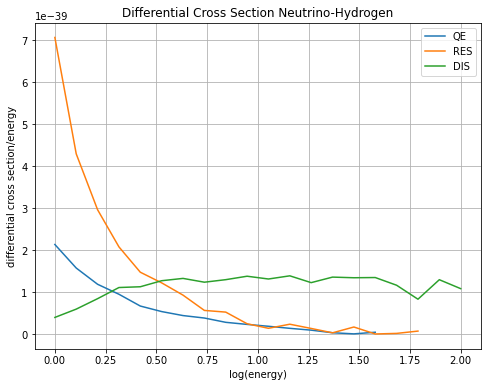

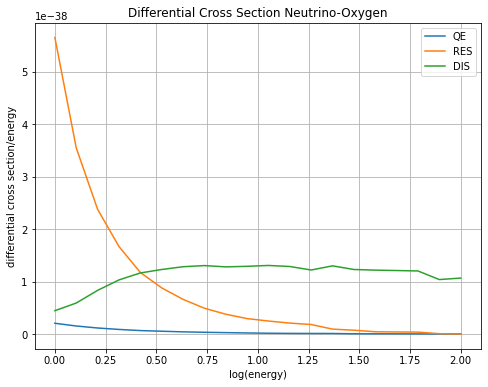

In [44]:
fig1=plt.figure(figsize=(8,6))
plt.title("Differential Cross Section Neutrino-Hydrogen")
plt.plot(np.log10(E_bin_H),cs_bin_H[:,0]/E_bin_H,label='QE')
plt.plot(np.log10(E_bin_H),cs_bin_H[:,1]/E_bin_H,label='RES')
plt.plot(np.log10(E_bin_H),cs_bin_H[:,2]/E_bin_H,label='DIS')
plt.legend()
plt.xlabel("log(energy)")
plt.ylabel("differential cross section/energy")
plt.grid()
plt.show()

fig2=plt.figure(figsize=(8,6))
plt.title("Differential Cross Section Neutrino-Oxygen")
plt.plot(np.log10(E_bin_O),cs_bin_O[:,0]/E_bin_O,label='QE')
plt.plot(np.log10(E_bin_O),cs_bin_O[:,1]/E_bin_O,label='RES')
plt.plot(np.log10(E_bin_O),cs_bin_O[:,2]/E_bin_O,label='DIS')
plt.xlabel("log(energy)")
plt.ylabel("differential cross section/energy")
plt.legend()
plt.grid()
plt.show()

# Differential Cross Section as Function of Bjorken x

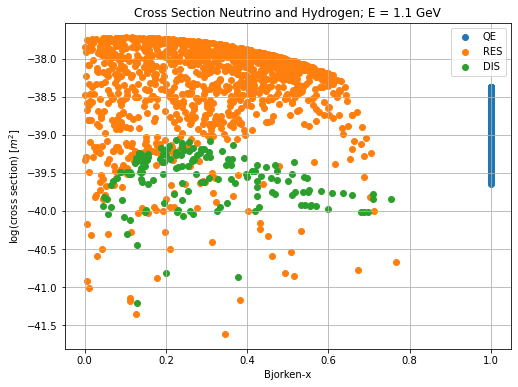

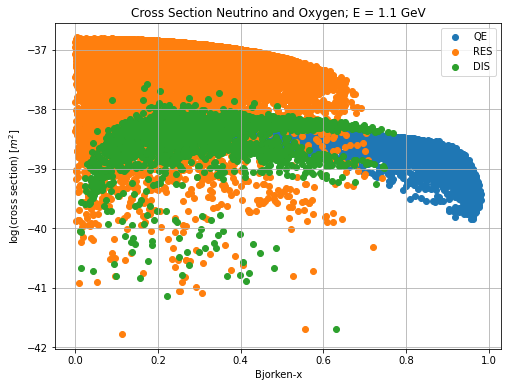

In [45]:
boolean_H_E = (energies_H>1)*(energies_H<1.1)
boolean_O_E = (energies_O>1)*(energies_O<1.1)

fig = plt.figure(figsize=(8,6))
plt.title("Cross Section Neutrino and Hydrogen; E = 1.1 GeV")
plt.scatter(bjorken_x_H[boolean_H_E*QE_H],np.log10(cross_section_H[boolean_H_E*QE_H]),label='QE')
plt.scatter(bjorken_x_H[boolean_H_E*RES_H],np.log10(cross_section_H[boolean_H_E*RES_H]),label='RES')
plt.scatter(bjorken_x_H[boolean_H_E*DIS_H],np.log10(cross_section_H[boolean_H_E*DIS_H]),label='DIS')
plt.legend()
plt.xlabel("Bjorken-x")            
plt.ylabel("log(cross section) [$m^2$]")
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.title("Cross Section Neutrino and Oxygen; E = 1.1 GeV")
plt.scatter(bjorken_x_O[boolean_O_E*QE_O],np.log10(cross_section_O[boolean_O_E*QE_O]),label='QE')
plt.scatter(bjorken_x_O[boolean_O_E*RES_O],np.log10(cross_section_O[boolean_O_E*RES_O]),label='RES')
plt.scatter(bjorken_x_O[boolean_O_E*DIS_O],np.log10(cross_section_O[boolean_O_E*DIS_O]),label='DIS')
plt.legend()
plt.xlabel("Bjorken-x")
plt.ylabel("log(cross section) [$m^2$]")
plt.grid()
plt.show()

In [46]:
x_bin_H,cs_bin_H = process_bins(cross_section_H[boolean_H_E],interaction_channel_H[boolean_H_E],bjorken_x_H[boolean_H_E],0,1,'linear',20)
x_bin_O,cs_bin_O = process_bins(cross_section_O[boolean_O_E],interaction_channel_O[boolean_O_E],bjorken_x_O[boolean_O_E],0,1,'linear',20)

x_bin_H_a,cs_bin_H_a = process_bins(cross_section_H_a[boolean_H_E_a],interaction_channel_H_a[boolean_H_E_a],bjorken_x_H_a[boolean_H_E_a],0,1,'linear',20)
x_bin_O_a,cs_bin_O_a = process_bins(cross_section_O_a[boolean_O_E_a],interaction_channel_O_a[boolean_O_E_a],bjorken_x_O_a[boolean_O_E_a],0,1,'linear',20)



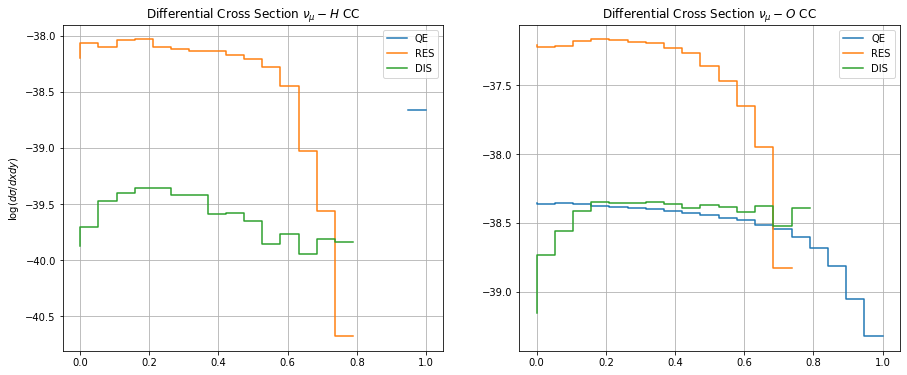

In [47]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].set_title(r"Differential Cross Section $\nu_{\mu}-H$ CC")
axs[0].step(x_bin_H,np.log10(cs_bin_H[:,0]),label='QE')
axs[0].step(x_bin_H,np.log10(cs_bin_H[:,1]),label='RES')
axs[0].step(x_bin_H,np.log10(cs_bin_H[:,2]),label='DIS')
axs[0].set_ylabel(r"log($d\sigma/dxdy$)")
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Differential Cross Section $\nu_{\mu}-O$ CC")
axs[1].step(x_bin_O,np.log10(cs_bin_O[:,0]),label='QE')
axs[1].step(x_bin_O,np.log10(cs_bin_O[:,1]),label='RES')
axs[1].step(x_bin_O,np.log10(cs_bin_O[:,2]),label='DIS')
axs[1].legend()
axs[1].grid()

plt.show()

# Differential Cross Section as a Function of Bjorken-y

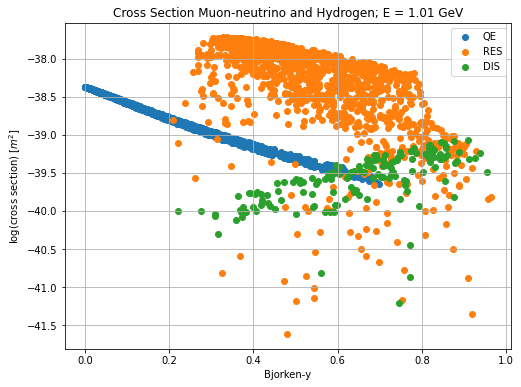

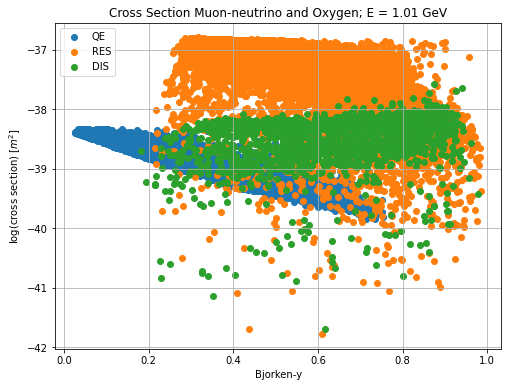

In [48]:
boolean_H_E = (energies_H>1)*(energies_H<1.1)
boolean_O_E = (energies_O>1)*(energies_O<1.1)

fig = plt.figure(figsize=(8,6))
plt.title("Cross Section Muon-neutrino and Hydrogen; E = 1.01 GeV")
plt.scatter(bjorken_y_H[boolean_H_E*QE_H],np.log10(cross_section_H[boolean_H_E*QE_H]),label='QE')
plt.scatter(bjorken_y_H[boolean_H_E*RES_H],np.log10(cross_section_H[boolean_H_E*RES_H]),label='RES')
plt.scatter(bjorken_y_H[boolean_H_E*DIS_H],np.log10(cross_section_H[boolean_H_E*DIS_H]),label='DIS')
plt.legend()
plt.xlabel("Bjorken-y")            
plt.ylabel("log(cross section) [$m^2$]")
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.title("Cross Section Muon-neutrino and Oxygen; E = 1.01 GeV")
plt.scatter(bjorken_y_O[boolean_O_E*QE_O],np.log10(cross_section_O[boolean_O_E*QE_O]),label='QE')
plt.scatter(bjorken_y_O[boolean_O_E*RES_O],np.log10(cross_section_O[boolean_O_E*RES_O]),label='RES')
plt.scatter(bjorken_y_O[boolean_O_E*DIS_O],np.log10(cross_section_O[boolean_O_E*DIS_O]),label='DIS')
plt.legend()
plt.xlabel("Bjorken-y")
plt.ylabel("log(cross section) [$m^2$]")
plt.grid()
plt.show()

In [49]:
y_bin_H,cs_bin_H = process_bins(cross_section_H[boolean_H_E],interaction_channel_H[boolean_H_E],bjorken_y_H[boolean_H_E],0,1,'linear',20)
y_bin_O,cs_bin_O = process_bins(cross_section_O[boolean_O_E],interaction_channel_O[boolean_O_E],bjorken_y_O[boolean_O_E],0,1,'linear',20)

y_bin_H,cs_bin_H = process_bins(cross_section_H,interaction_channel_H,bjorken_y_H,0,1,'linear',20)
y_bin_O,cs_bin_O = process_bins(cross_section_O,interaction_channel_O,bjorken_y_O,0,1,'linear',20)



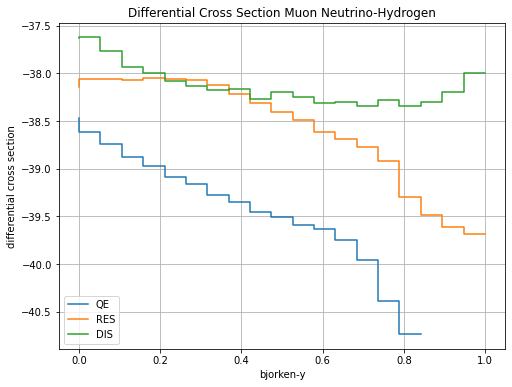

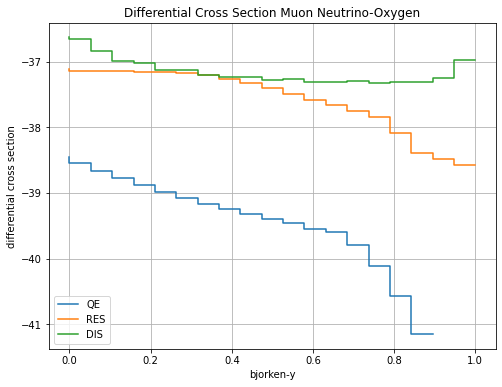

In [50]:
fig5=plt.figure(figsize=(8,6))
plt.title("Differential Cross Section Muon Neutrino-Hydrogen")
plt.step(y_bin_H,np.log10(cs_bin_H[:,0]),label='QE')
plt.step(y_bin_H,np.log10(cs_bin_H[:,1]),label='RES')
plt.step(y_bin_H,np.log10(cs_bin_H[:,2]),label='DIS')
plt.ylabel("differential cross section")
plt.xlabel("bjorken-y")
plt.legend()
plt.grid()
plt.show()

fig6=plt.figure(figsize=(8,6))
plt.title("Differential Cross Section Muon Neutrino-Oxygen")
plt.step(y_bin_O,np.log10(cs_bin_O[:,0]),label='QE')
plt.step(y_bin_O,np.log10(cs_bin_O[:,1]),label='RES')
plt.step(y_bin_O,np.log10(cs_bin_O[:,2]),label='DIS')
plt.ylabel("differential cross section")
plt.xlabel("bjorken-y")
plt.legend()
plt.grid()
plt.show()